In [19]:
# Project 3.

# Цель-исследовать поведение пользователей в обновленном приложении игры



# Гипотеза 1

# По идее, должна быть разница в поведении групп, которые проходят и не проходят обучение. Но так ли это? Влияет ли обучение на скорость прохождения других этапов игры?


# Гипотеза 2

# Кажется, повторное прохождение обучения положительно влияет на оплату, верно?


# Гипотеза 3

# Если пользователь сначала выбирает сложность обучения, будет ли он потом проходить обучение?


#  Задачи:

# Определить, насколько обучение сокращает время прохождения этапов игры.
# Доказать, что успешное обучение само по себе влияет на оплату и не имеет значения то, каким этапом оно шло.
# Проверить, насколько прозрачен процесс взаимодействия с игрой.


# КОНКРЕТНЫЕ ШАГИ (ФОРМАЛИЗОВАННЫЕ ЗАДАЧИ)

# Сравнить время прохождения различных этапов для пользователей, которые завершили обучение, и пользователей, не начинавших обучение. Если показатель отличается, выяснить, насколько.
# Проверить, существует ли зависимость между вероятностью оплаты вопросов и количеством обучений, которые начинал или завершал пользователь. 
# Выяснить, как часто пользователи начинают обучение после выбора уровня сложности. (Это позволит оценить прозрачность процесса взаимодействия с игрой: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна.)

In [20]:
# Гипотеза 1 
# Импортируем библиотеку Pandas и считываем данные в виде таблицы event и purchase

import pandas as pd
event=pd.read_csv('C:/Users/user/Documents/data/7_4_Events.csv', sep=',')
purchase=pd.read_csv('C:/Users/user/Downloads/purchase.csv', sep=',')


event_df=event[event['start_time'] >= '2018-01-01'] # создаем датафреймы только с данными 2018года
event_df=event_df[event_df['start_time'] <= '2018-12-31'] 
purchase_df=purchase[purchase['event_datetime'] >= '2018-01-01'] 
purchase_df=purchase_df[purchase_df['event_datetime'] <= '2018-12-31'] 


purchase_df['event_type'] = 'purchase'
events_df = event_df.rename(columns ={'id':'event_id'})#переименовываем столбцы для удобства
purchase_df = purchase_df.rename(columns={"id": "purchase_id", "event_datetime": "start_time"})


events_df['start_time']=pd.to_datetime(events_df['start_time'])#переводим столбцы со временем в формат времени
purchase_df['start_time']=pd.to_datetime(purchase_df['start_time'])


total_events_df = pd.concat([events_df,purchase_df],sort=False)#создаем общую таблицу из двух исходных датафреймов и переводим столбец со временем в формат времени
total_events_df['start_time']=pd.to_datetime(total_events_df['start_time'])


pivot_df = pd.pivot_table(total_events_df, values='start_time', index='user_id', #создаем сводную таблицу по событиям
                            columns='event_type', aggfunc = min)


pivot_df['timedelta_registration']=(pivot_df['tutorial_start']-pivot_df['registration'])/pd.Timedelta('1 hour')# время на регистрацию
pivot_df['timedelta_start']=(pivot_df['tutorial_finish']-pivot_df['tutorial_start'])/pd.Timedelta('1 hour')# время на старт обучения
pivot_df['timedelta_finish']=(pivot_df['level_choice']-pivot_df['tutorial_finish'])/pd.Timedelta('1 hour')# время на финиш обучения
pivot_df['timedelta_level']=(pivot_df['pack_choice']-pivot_df['level_choice'])/pd.Timedelta('1 hour')# время на выбор уровня сложности игры


display(pivot_df)

event_type,level_choice,pack_choice,purchase,registration,tutorial_finish,tutorial_start,timedelta_registration,timedelta_start,timedelta_finish,timedelta_level
user_id,,,,,,,,,,
27594,NaT,NaT,2018-01-02 18:48:55,NaT,NaT,NaT,NaN,NaN,NaN,NaN
27776,NaT,NaT,2018-01-01 23:15:21,NaT,NaT,NaT,NaN,NaN,NaN,NaN
27780,NaT,NaT,2018-01-02 19:58:20,NaT,NaT,NaT,NaN,NaN,NaN,NaN
27791,NaT,NaT,2018-01-01 12:37:02,NaT,NaT,NaT,NaN,NaN,NaN,NaN
27799,NaT,NaT,2018-01-01 23:23:49,NaT,NaT,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
47741,NaT,NaT,NaT,2018-12-30 20:41:06,2018-12-30 23:14:29,2018-12-30 23:12:42,2.526667,0.029722,NaN,NaN
47742,NaT,NaT,NaT,2018-12-30 20:48:42,NaT,NaT,NaN,NaN,NaN,NaN
47743,NaT,NaT,NaT,2018-12-30 21:27:31,NaT,NaT,NaN,NaN,NaN,NaN


In [21]:
# Создаем списки обучавшихся и необучавшихся пользователей

users_with_started_tutorial = set(total_events_df[total_events_df['event_type'] == 'tutorial_start']['user_id'])# начавшие учебу
all_users = set(total_events_df['user_id'])# все
not_start_tutorial = all_users.difference(users_with_started_tutorial)# не начинавшие учебу
tutorial_finished_users = set(total_events_df[total_events_df["event_type"] == "tutorial_finish"]['user_id'])# прошли обучение


# Создаем столбец group для обозначения разных групп с помощью функции

def get_tutorial_status(user_id):
    if user_id in tutorial_finished_users:
        return 'FINISHED'
    elif user_id in not_start_tutorial:
        return 'NOT_START'
    else:
        return 'UNNOWN'
    
total_events_df['group']=total_events_df['user_id'].apply(get_tutorial_status)


not_start=total_events_df[total_events_df['group']=='NOT_START']#создаем датафрейм из общей таблицы, разделенной по группам обучившихся и необучившихся, где только необучившиеся
display(not_start)

pivot_df1 = pd.pivot_table(not_start, values='start_time', index='user_id', #создаем сводную таблицу для необучившихся
                            columns='event_type', aggfunc = min)
pivot_df1['timedelta_registration']=(pivot_df1['level_choice']-pivot_df1['registration'])/pd.Timedelta('1 hour')# время на регистрацию
pivot_df1['timedelta_level']=(pivot_df1['pack_choice']-pivot_df1['level_choice'])/pd.Timedelta('1 hour')# время на выбор уровня сложности
pivot_df1['timedelta_pack']=(pivot_df1['purchase']-pivot_df1['pack_choice'])/pd.Timedelta('1 hour')# время на выбор пакетов вопросов
display(pivot_df1)

finished=total_events_df[total_events_df['group']=='FINISHED']#создаем датафрейм из общей таблицы, разделенной по группам обучившихся и необучившихся, где только обучившиеся
display(finished)

pivot_df2 = pd.pivot_table(finished, values='start_time', index='user_id', #создаем сводную таблицу для обучившихся
                            columns='event_type', aggfunc = min)
pivot_df2['timedelta_registration']=(pivot_df2['tutorial_start']-pivot_df2['registration'])/pd.Timedelta('1 hour')# время на регистрацию
pivot_df2['timedelta_start']=(pivot_df2['tutorial_finish']-pivot_df2['tutorial_start'])/pd.Timedelta('1 hour')# время на старт обучения
pivot_df2['timedelta_finish']=(pivot_df2['level_choice']-pivot_df2['tutorial_finish'])/pd.Timedelta('1 hour')# время на финиш обучения
pivot_df2['timedelta_level']=(pivot_df2['pack_choice']-pivot_df2['level_choice'])/pd.Timedelta('1 hour')# время на выбор уровня сложности игры
display(pivot_df2)


generally_pivot=pd.concat([pivot_df1,pivot_df2],sort=False)
display(generally_pivot)



,event_id,event_type,selected_level,start_time,tutorial_id,user_id,purchase_id,amount,group
51405,80308.0,registration,NaN,2018-01-01 03:48:40,NaN,27832,NaN,NaN,NOT_START
51410,80313.0,registration,NaN,2018-01-01 14:08:40,NaN,27837,NaN,NaN,NOT_START
51411,80314.0,registration,NaN,2018-01-01 14:42:58,NaN,27838,NaN,NaN,NOT_START
51432,80335.0,registration,NaN,2018-01-02 00:13:22,NaN,27844,NaN,NaN,NOT_START
51442,80345.0,registration,NaN,2018-01-02 06:05:02,NaN,27848,NaN,NaN,NOT_START
...,...,...,...,...,...,...,...,...,...
2588,NaN,purchase,NaN,2018-11-30 00:40:53,NaN,45399,18262.0,100.0,NOT_START
2602,NaN,purchase,NaN,2018-12-01 11:57:18,NaN,45961,18276.0,50.0,NOT_START
2611,NaN,purchase,NaN,2018-12-02 13:25:31,NaN,45518,18285.0,250.0,NOT_START
2649,NaN,purchase,NaN,2018-12-09 22:25:45,NaN,46548,18323.0,200.0,NOT_START


event_type,level_choice,pack_choice,purchase,registration,timedelta_registration,timedelta_level,timedelta_pack
user_id,,,,,,,
27594,NaT,NaT,2018-01-02 18:48:55,NaT,NaN,NaN,NaN
27776,NaT,NaT,2018-01-01 23:15:21,NaT,NaN,NaN,NaN
27780,NaT,NaT,2018-01-02 19:58:20,NaT,NaN,NaN,NaN
27791,NaT,NaT,2018-01-01 12:37:02,NaT,NaN,NaN,NaN
27799,NaT,NaT,2018-01-01 23:23:49,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...
47740,NaT,NaT,NaT,2018-12-30 19:10:57,NaN,NaN,NaN
47742,NaT,NaT,NaT,2018-12-30 20:48:42,NaN,NaN,NaN
47743,NaT,NaT,NaT,2018-12-30 21:27:31,NaN,NaN,NaN


,event_id,event_type,selected_level,start_time,tutorial_id,user_id,purchase_id,amount,group
51406,80309.0,registration,NaN,2018-01-01 04:07:25,NaN,27833,NaN,NaN,FINISHED
51407,80310.0,registration,NaN,2018-01-01 08:35:10,NaN,27834,NaN,NaN,FINISHED
51408,80311.0,registration,NaN,2018-01-01 11:54:47,NaN,27835,NaN,NaN,FINISHED
51409,80312.0,registration,NaN,2018-01-01 13:28:07,NaN,27836,NaN,NaN,FINISHED
51412,80315.0,tutorial_start,NaN,2018-01-01 14:54:40,31505.0,27836,NaN,NaN,FINISHED
...,...,...,...,...,...,...,...,...,...
2755,NaN,purchase,NaN,2018-12-30 01:39:50,NaN,47671,18429.0,200.0,FINISHED
2756,NaN,purchase,NaN,2018-12-30 03:48:54,NaN,47576,18430.0,50.0,FINISHED
2757,NaN,purchase,NaN,2018-12-30 06:49:56,NaN,47586,18431.0,25.0,FINISHED
2758,NaN,purchase,NaN,2018-12-30 09:05:28,NaN,47687,18432.0,100.0,FINISHED


event_type,level_choice,pack_choice,purchase,registration,tutorial_finish,tutorial_start,timedelta_registration,timedelta_start,timedelta_finish,timedelta_level
user_id,,,,,,,,,,
27833,NaT,NaT,NaT,2018-01-01 04:07:25,2018-01-01 17:50:08,2018-01-01 17:47:40,13.670833,0.041111,NaN,NaN
27834,NaT,NaT,NaT,2018-01-01 08:35:10,2018-01-01 19:48:01,2018-01-01 19:46:11,11.183611,0.030556,NaN,NaN
27835,2018-01-01 20:37:22,2018-01-01 20:38:43,NaT,2018-01-01 11:54:47,2018-01-01 15:06:15,2018-01-01 15:00:51,3.101111,0.090000,5.518611,0.022500
27836,NaT,NaT,NaT,2018-01-01 13:28:07,2018-01-01 15:42:58,2018-01-01 14:54:40,1.442500,0.805000,NaN,NaN
27839,2018-01-01 22:37:50,2018-01-01 22:42:54,NaT,2018-01-01 18:24:01,2018-01-01 19:16:32,2018-01-01 19:11:36,0.793056,0.082222,3.355000,0.084444
...,...,...,...,...,...,...,...,...,...,...
47730,NaT,NaT,NaT,2018-12-30 13:48:27,2018-12-30 14:11:04,2018-12-30 14:05:31,0.284444,0.092500,NaN,NaN
47733,2018-12-30 19:44:52,NaT,NaT,2018-12-30 14:44:47,2018-12-30 18:29:19,2018-12-30 18:26:55,3.702222,0.040000,1.259167,NaN
47737,NaT,NaT,NaT,2018-12-30 17:09:01,2018-12-30 17:43:50,2018-12-30 17:38:54,0.498056,0.082222,NaN,NaN


event_type,level_choice,pack_choice,purchase,registration,timedelta_registration,timedelta_level,timedelta_pack,tutorial_finish,tutorial_start,timedelta_start,timedelta_finish
user_id,,,,,,,,,,,
27594,NaT,NaT,2018-01-02 18:48:55,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN
27776,NaT,NaT,2018-01-01 23:15:21,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN
27780,NaT,NaT,2018-01-02 19:58:20,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN
27791,NaT,NaT,2018-01-01 12:37:02,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN
27799,NaT,NaT,2018-01-01 23:23:49,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
47730,NaT,NaT,NaT,2018-12-30 13:48:27,0.284444,NaN,NaN,2018-12-30 14:11:04,2018-12-30 14:05:31,0.092500,NaN
47733,2018-12-30 19:44:52,NaT,NaT,2018-12-30 14:44:47,3.702222,NaN,NaN,2018-12-30 18:29:19,2018-12-30 18:26:55,0.040000,1.259167
47737,NaT,NaT,NaT,2018-12-30 17:09:01,0.498056,NaN,NaN,2018-12-30 17:43:50,2018-12-30 17:38:54,0.082222,NaN


In [22]:
import plotly                   # импортируем библиотеку для построения графика
import plotly.express as px

generally_table=total_events_df.merge(generally_pivot,on='user_id',how='left')


bar_table=generally_table.groupby('group')['timedelta_registration','timedelta_level','timedelta_pack'].mean()
display(bar_table.head())




C:\Users\user\AppData\Local\Temp\ipykernel_5588\2096034232.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bar_table=generally_table.groupby('group')['timedelta_registration','timedelta_level','timedelta_pack'].mean()


,timedelta_registration,timedelta_level,timedelta_pack
group,,,
FINISHED,3.968224,0.087957,NaN
NOT_START,5.120481,0.089923,100.825997
UNNOWN,NaN,NaN,NaN


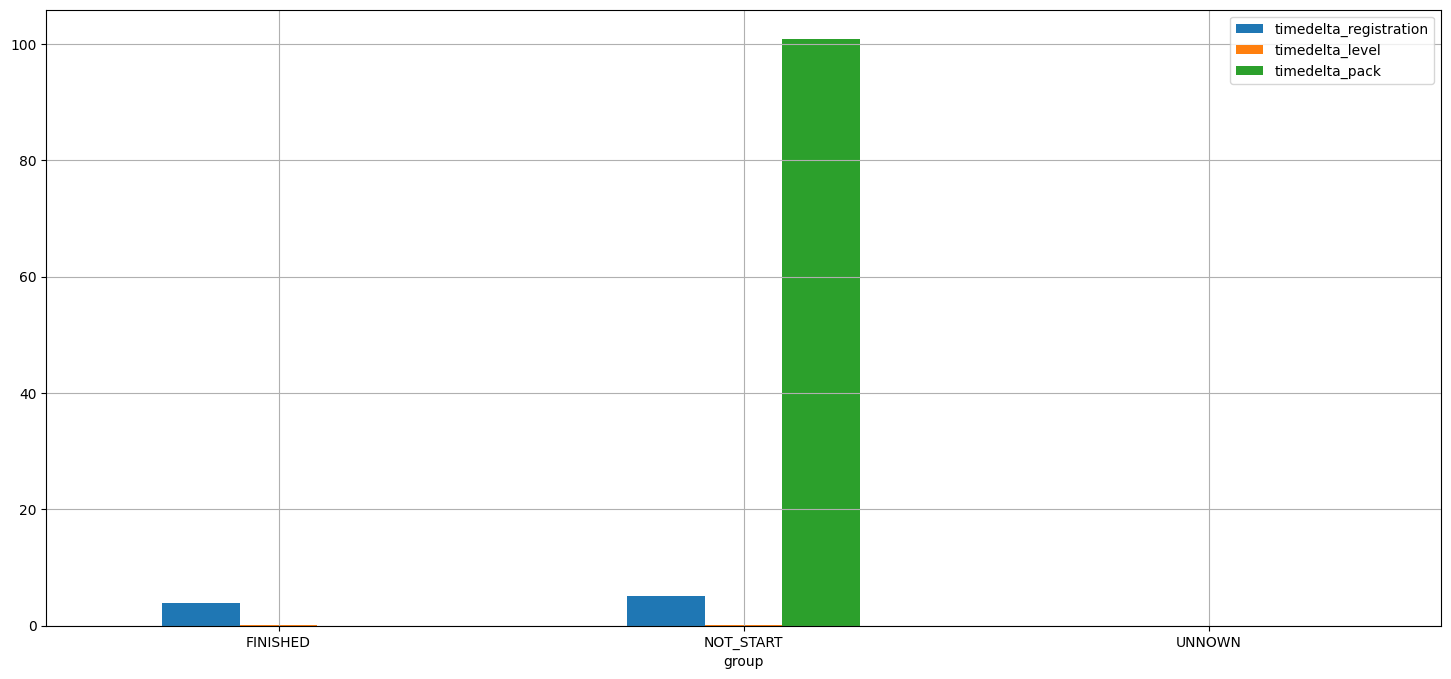

In [23]:
bar_data = bar_table.reset_index() # строим график
bar_data.plot(
    kind='bar',
    grid=True,
    figsize=(18, 8),
    x='group',
    rot=0,
    fontsize=10
    ) ;

In [10]:
# Выводы по гипотезе 1
# Как видно из графика, в группе, прошедшей обучение, по каждому этапу игры времени уходит меньше, чем в группе, которыая не проходила обучение.
# В группе с неизвестными данными отсутствуют показатели затраченного времени.
# Действительно, есть разница в поведении групп, которые проходят и не проходят обучение.  Скорость прохождения этапов игры у группы, которые проходят обучение, выше.

user_id
27833    1
27834    1
27835    1
27836    2
27839    1
        ..
47730    3
47733    1
47737    1
47738    1
47741    1
Name: tutorial_id, Length: 11847, dtype: int64
1    76.8
2    13.4
3     3.6
4     1.9
6     1.0
9     1.0
5     0.9
7     0.8
8     0.7
Name: tutorial_id, dtype: float64


,Группы (start),"Количество пользователей, чел.","Количество клиентов, чел.","Конверсия, %"
1,1,9093,1197,13.16
2,2,1588,217,13.66
3,3,428,50,11.68
4,4,220,30,13.64
5,5,109,16,14.68
6,6,116,14,12.07
7,7,94,12,12.77
8,8,86,13,15.12
9,9,113,17,15.04
Итого,9,11847,1566,13.22


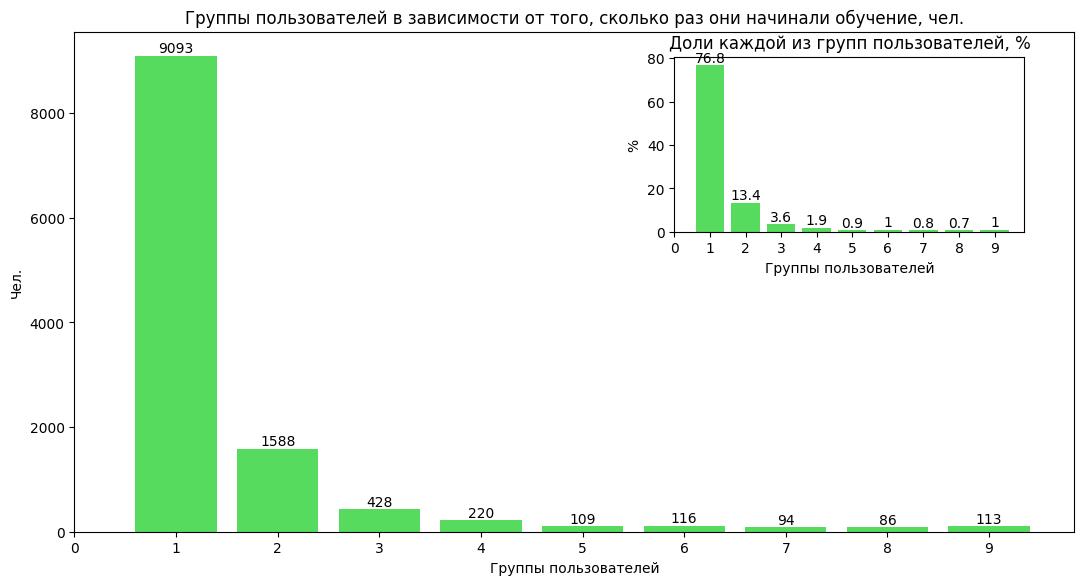

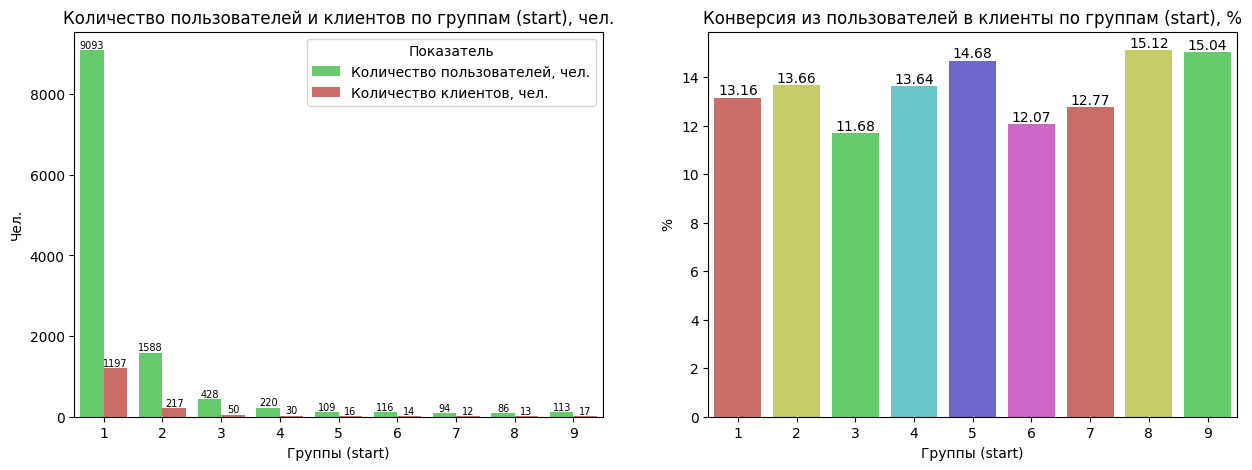

In [24]:
# Гипотеза 2
# Разделим пользователей на группы в зависимости от того, сколько раз они начинали обучение
users_start_groups = generally_table.groupby(by = 'user_id')['tutorial_id'].nunique() # Вычислим сколько событий tutorial_start у каждого юзера
users_start_groups = users_start_groups[users_start_groups != 0] #уберем пользователей, которые вообще не проходили обучение
start_groups = users_start_groups.value_counts().sort_index() #создадим серию с количеством пользователей для каждого числа начала обучений
start_groups_percent = users_start_groups.value_counts(normalize = True) #посчитаем долю каждой группы от общего числа пользователей, начинавших обучение
start_groups_percent = round(start_groups_percent * 100, 1)
print(users_start_groups)
print(start_groups_percent)


# Постороим столбчатые диграммы, характеризующие группы по количеству обучений, которые начинал пользователь

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


fig3 = plt.figure(figsize = (10,5))
axes3 = fig3.add_axes([0, 0, 1, 1])
axes4 = fig3.add_axes([0.6, 0.6, 0.35, 0.35])
axes3.bar(x = start_groups.index, height = start_groups, color = sns.color_palette('hls')[2])
axes3.set_title('Группы пользователей в зависимости от того, сколько раз они начинали обучение, чел.');
axes3.set_ylabel('Чел.');
axes3.set_xlabel('Группы пользователей');
axes3.set_xticks(range(0, 10, 1))
axes3.bar_label(axes3.containers[0]); 
axes4.bar(x = start_groups_percent.index, height = start_groups_percent, color = sns.color_palette('hls')[2])
axes4.set_title('Доли каждой из групп пользователей, %');
axes4.set_ylabel('%');
axes4.set_xlabel('Группы пользователей');
axes4.set_xticks(range(0, 10, 1))
axes4.bar_label(axes4.containers[0]); 

# Создадим списки пользователей в зависимости от того, сколько раз они начинали обучение
start_list = [] # Создадим с помощью цикла один большой список, где будут храниться все эти списки
for i in start_groups.index:
    start = list(users_start_groups[users_start_groups == i].index)
    start_list.append(start)
    
# Найдем, какое количество пользователей из каждой группы совершило оплату:
purshase_start_list = [] # создадим с помощью цикла список, с количеством оплативших пользователей для каждой группы
for i in start_list:
    purshase_start = generally_table[(generally_table['event_type'] == 'purchase') & (generally_table['user_id'].isin(i))]['user_id'].nunique()
    purshase_start_list.append(purshase_start)
purshase_start_list = pd.Series(purshase_start_list, index = range(1, 10)) # сделаем из этого списка серию, где индексами будут количества начатых обучений

# Создадим общую таблицу, с группами пользователей, количеством юзеров в них, количеством покупателей и конверсией
start_table = pd.concat(objs = [start_groups, purshase_start_list], axis = 1) # Для этого объединим серию с количеством пользователей для каждого числа начала обучений и серию с числом клиентов
start_table.columns = ['Количество пользователей, чел.', 'Количество клиентов, чел.']
start_table['Группы (start)'] = start_table.index
start_table = start_table[['Группы (start)', 'Количество пользователей, чел.', 'Количество клиентов, чел.']] # Поменяем столбцы местами в таблице для удобства 
start_table['Конверсия, %'] = round((start_table['Количество клиентов, чел.'] / start_table['Количество пользователей, чел.']) * 100, 2) # Вычислим конверсию
# Добавим строку итого
start_itog = pd.DataFrame(data = [[start_table['Группы (start)'].count(), start_table['Количество пользователей, чел.'].sum(), 
                                   start_table['Количество клиентов, чел.'].sum(),  round(start_table['Количество клиентов, чел.'].sum()/start_table['Количество пользователей, чел.'].sum()*100, 2)]],
                                   columns = list(start_table.columns), index = ['Итого'])
start_table2 = pd.concat(objs = [start_table, start_itog])
display(start_table2)


# Немного преобразуем таблицу start_table, чтобы по ней можно было бы построить диаграмму с параметором hue, чтобы столбцы для категорий клиентов и пользователей отображались отдельно, 
# т.к. если данные по пользователям и клиентам будут отображаться на одном столбце, их значения будут сливаться

start_table1 = start_table.copy()
start_table1['Показатель'] = 'Количество пользователей, чел.'
start_table1['Показатель1'] = 'Количество клиентов, чел.'
tab1 = start_table1[['Группы (start)',	'Количество пользователей, чел.', 'Показатель']].rename(columns = {'Количество пользователей, чел.':'Количество'})
tab2 = start_table1[['Группы (start)',	'Количество клиентов, чел.', 'Показатель1']].rename(columns = {'Количество клиентов, чел.':'Количество', 'Показатель1':'Показатель'})
start_table1 = pd.concat(objs = [tab1, tab2])

# Построим 2 диаграммы. На первой будет количество пользователей и количество клиентов в каждой группе. 
# Вторая будет отражать процент оплат для групп пользователей в зависимости от количества начатых обучений.
fig5, axes5 = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
barplot1 = sns.barplot(data = start_table1, y = 'Количество', x = 'Группы (start)', ax = axes5[0], hue = 'Показатель', palette=[sns.color_palette('hls')[2], sns.color_palette('hls')[0]])
barplot1.set_title('Количество пользователей и клиентов по группам (start), чел.');
barplot1.set_xlabel('Группы (start)');
barplot1.set_ylabel('Чел.');
barplot1.bar_label(barplot1.containers[0], fontsize=7); 
barplot1.bar_label(barplot1.containers[1], fontsize=7);

barplot2 = sns.barplot(data = start_table, y = 'Конверсия, %', x = 'Группы (start)', ax = axes5[1], palette=sns.color_palette('hls'))
barplot2.set_title('Конверсия из пользователей в клиенты по группам (start), %');
barplot2.set_xlabel('Группы (start)');
barplot2.set_ylabel('%');
barplot2.bar_label(barplot2.containers[0], fontsize=10); 


,Группы (finish),"Количество пользователей, чел.","Количество клиентов, чел.","Конверсия, %"
1,1,8005,1133,14.15
2,2,1321,180,13.63
3,3,344,44,12.79
4,4,178,19,10.67
5,5,117,19,16.24
6,6,101,15,14.85
7,7,97,15,15.46
8,8,54,6,11.11
9,9,22,4,18.18
Итого,9,10239,1435,14.02


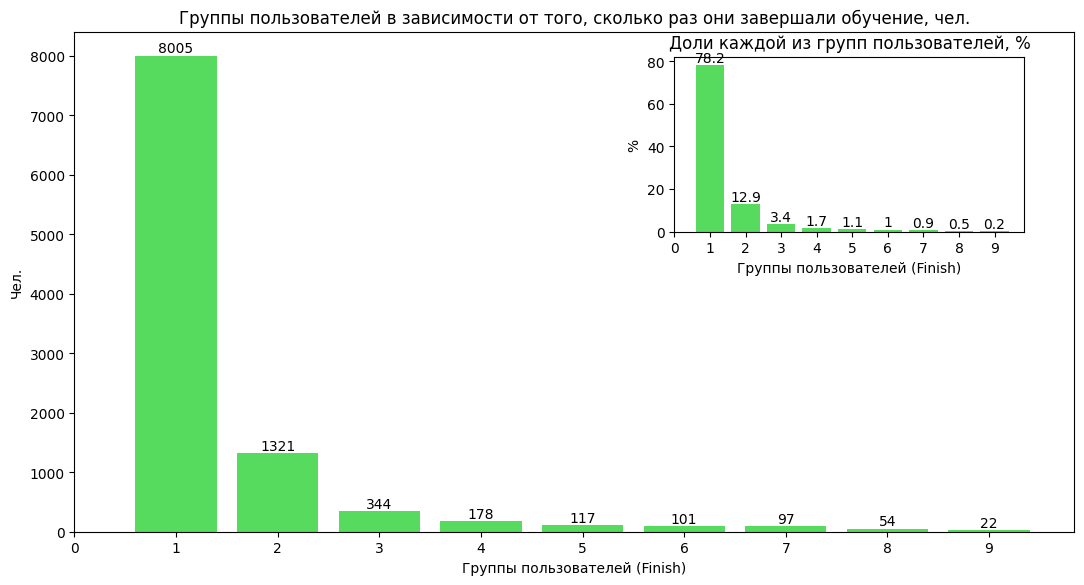

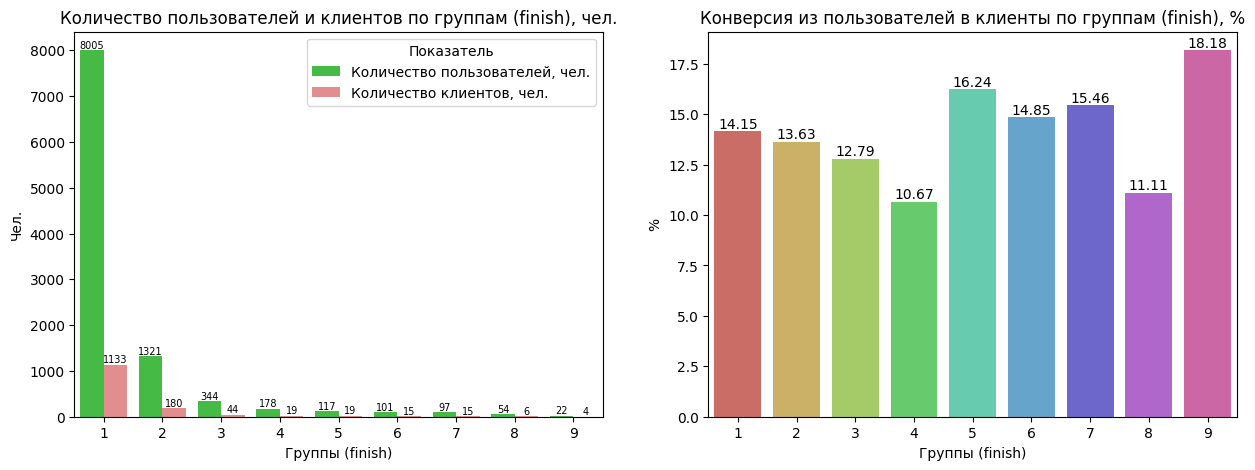

In [25]:
# Построим аналогично таблицу и диаграммы для групп пользователей в зависимости от того, сколько раз они завершали обучение
# Разделим пользователей на группы в зависимости от того, сколько раз они завершали обучение
users_finish_groups = generally_table[generally_table['event_type'] == 'tutorial_finish'].groupby(by = 'user_id')['tutorial_id'].nunique() # Вычислим сколько событий tutorial_finish у каждого юзера
finish_groups = users_finish_groups.value_counts().sort_index() #создадим серию с количеством пользователей для каждого числа завершения обучений
finish_groups_percent = users_finish_groups.value_counts(normalize = True) #посчитаем долю каждой группы от общего числа пользователей, завершавших обучение 
finish_groups_percent = round(finish_groups_percent * 100, 1)

# Постороим столбчатые диграммы, характеризующие группы по количеству обучений, которые завершал пользователь
fig6 = plt.figure(figsize = (10,5))
axes6 = fig6.add_axes([0, 0, 1, 1])
axes7 = fig6.add_axes([0.6, 0.6, 0.35, 0.35])
axes6.bar(x = finish_groups.index, height = finish_groups, color = sns.color_palette('hls')[2])
axes6.set_title('Группы пользователей в зависимости от того, сколько раз они завершали обучение, чел.');
axes6.set_ylabel('Чел.');
axes6.set_xlabel('Группы пользователей (Finish)');
axes6.set_xticks(range(0, 10, 1))
axes6.bar_label(axes6.containers[0]); 
axes7.bar(x = finish_groups_percent.index, height = finish_groups_percent, color = sns.color_palette('hls')[2])
axes7.set_title('Доли каждой из групп пользователей, %');
axes7.set_ylabel('%');
axes7.set_xlabel('Группы пользователей (Finish)');
axes7.set_xticks(range(0, 10, 1))
axes7.bar_label(axes7.containers[0]); 

# Создадим списки пользователей в зависимости от того, сколько раз они завершали обучение
finish_list = [] # Создадим с помощью цикла один большой список, где будут храниться все эти списки
for i in finish_groups.index:
    finish = list(users_finish_groups[users_finish_groups == i].index)
    finish_list.append(finish)

# Найдем, какое количество пользователей из каждой группы совершило оплату:
purshase_finish_list = [] # создадим с помощью цикла список, с количеством оплативших пользователей для каждой группы
for i in finish_list:
    purshase_finish = generally_table[(generally_table['event_type'] == 'purchase') & (generally_table['user_id'].isin(i))]['user_id'].nunique()
    purshase_finish_list.append(purshase_finish)
purshase_finish_list = pd.Series(purshase_finish_list, index = range(1, 10)) # сделаем из этого списка серию, где индексами будут количества завершенных обучений

# Создадим общую таблицу, с группами пользователей, количеством юзеров в них, количеством покупателей и конверсией
finish_table = pd.concat(objs = [finish_groups, purshase_finish_list], axis = 1) # Для этого объединим серию с количеством пользователей для каждого числа завершения обучений и серию с числом клиентов
finish_table.columns = ['Количество пользователей, чел.', 'Количество клиентов, чел.']
finish_table['Группы (finish)'] = finish_table.index
finish_table = finish_table[['Группы (finish)', 'Количество пользователей, чел.', 'Количество клиентов, чел.']] # Поменяем столбцы местами в таблице для удобства 
finish_table['Конверсия, %'] = round((finish_table['Количество клиентов, чел.'] / finish_table['Количество пользователей, чел.']) * 100, 2) # Вычислим конверсию
# Добавим строку итого
finish_itog = pd.DataFrame(data = [[finish_table['Группы (finish)'].count(), finish_table['Количество пользователей, чел.'].sum(), 
                                   finish_table['Количество клиентов, чел.'].sum(),  round(finish_table['Количество клиентов, чел.'].sum()/finish_table['Количество пользователей, чел.'].sum()*100, 2)]],
                                   columns = list(finish_table.columns), index = ['Итого'])
finish_table2 = pd.concat(objs = [finish_table, finish_itog])
display(finish_table2)

# Немного преобразуем таблицу finish_table, чтобы по ней можно было бы построить диаграмму с параметором hue, чтобы столбцы для категорий клиентов и пользователей отображались отдельно, 
# т.к. если данные по пользователям и клиентам будут отображаться на одном столбце, их значения будут сливаться

finish_table1 = finish_table.copy()
finish_table1['Показатель'] = 'Количество пользователей, чел.'
finish_table1['Показатель1'] = 'Количество клиентов, чел.'
tab3 = finish_table1[['Группы (finish)',	'Количество пользователей, чел.', 'Показатель']].rename(columns = {'Количество пользователей, чел.':'Количество'})
tab4 = finish_table1[['Группы (finish)',	'Количество клиентов, чел.', 'Показатель1']].rename(columns = {'Количество клиентов, чел.':'Количество', 'Показатель1':'Показатель'})
finish_table1 = pd.concat(objs = [tab3, tab4])

# Построим 2 диаграммы. На первой будет количество пользователей и количество клиентов в каждой группе. 
# Вторая будет отражать процент оплат для групп пользователей в зависимости от количества завершенных обучений.
fig6, axes6 = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
barplot3 = sns.barplot(data = finish_table1, y = 'Количество', x = 'Группы (finish)', ax = axes6[0], hue = 'Показатель', palette=['limegreen', 'lightcoral'])
barplot3.set_title('Количество пользователей и клиентов по группам (finish), чел.');
barplot3.set_xlabel('Группы (finish)');
barplot3.set_ylabel('Чел.');
barplot3.bar_label(barplot3.containers[0], fontsize=7); 
barplot3.bar_label(barplot3.containers[1], fontsize=7);

barplot4 = sns.barplot(data = finish_table, y = 'Конверсия, %', x = 'Группы (finish)', ax = axes6[1], palette= 'hls')
barplot4.set_title('Конверсия из пользователей в клиенты по группам (finish), %');
barplot4.set_xlabel('Группы (finish)');
barplot4.set_ylabel('%');
barplot4.bar_label(barplot4.containers[0], fontsize=10); 


In [26]:
# Выводы по 2 гипотезе
# Таким образом, выделено 9 групп пользователей, начавших обучение. То есть обучение проходили от 1 до 9 раз.Чаще всего оучение проходили 1 раз, либо 2 раза.
# Также 9 групп, закончивших обучение по количеству раз.
# Чем больше пользователей приходит в игру, тем больше клиентов из них становится.
# Да, можно сказать, что повторное обучение влияет на оплату пакета, но процент незначителен и составляет приблизительно 0,5% по сравнению с группой, прошедшей обучение 1 раз.Это что касается групп, начавших обучение.
# По группам, закончивших обучение, повторное обучение не влияет на оплату пакета(процент меньше на 0,52% по сравнению с группой, закончивших обучение 1 раз)
# Самый высокий процент в группах, которые проходили обучение по 7 и 8 раз, но и он не слишком высок(15,12% и 15,04%% в группах по количеству начатых обучений и 11,11% и 11,18% в группах по количеству закончивших обучение соответственно)

level_paths
level_choice>pack_choice                             3481
level_choice                                         2137
level_choice>tutorial_start                          1385
level_choice>pack_choice>purchase                    1322
level_choice>tutorial_finish                            2
level_choice>tutorial_finish>pack_choice                2
level_choice>tutorial_finish>pack_choice>purchase       2
level_choice>pack_choice>tutorial_finish                1
Name: user_id, dtype: int64

level_paths
level_choice>pack_choice             3481
level_choice>tutorial_start          1385
level_choice>pack_choice>purchase    1322
level_choice>tutorial_finish         1329
Name: user_id, dtype: int64

,Пути пользователей после выбора уровня сложности,"Количество пользователей, чел.","Процент пользователей, %"
0,level_choice>pack_choice,3481,46.31
1,level_choice>tutorial_start,1385,18.42
2,level_choice>pack_choice>purchase,1322,17.59
3,level_choice>tutorial_finish,1329,17.68
4,Итого,7517,100.00


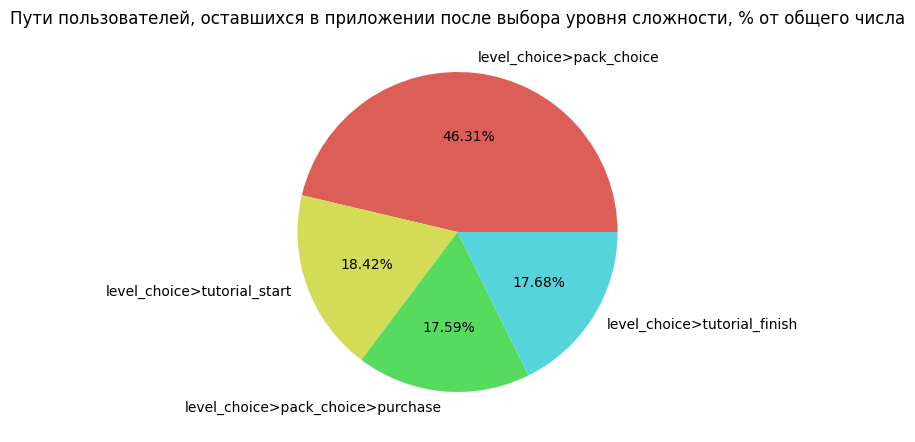

In [27]:
# Гипотеза 3
# Для решения задачи сначала определим, какой путь проходил каждый из пользователей
import numpy as np
total3 = generally_table.sort_values(by = ['user_id', 'start_time']) # Сделаем в таблице total сортировку по пользователю и по времени события
user_paths = total3.groupby(by = 'user_id')['event_type'].apply(list).reset_index() # Определяем, какой путь в игре проходил каждый из пользователей

# Оставим только тех пользователей, которые дошли до этапа, необходимого нам по условию задачи - 'level_choice'
user_paths['event_type'] = user_paths['event_type'].apply(lambda x: x if 'level_choice' in x else np.nan) # Обозначим как NaN тех пользователей, которые не дошли до этапа level_choice
user_paths = user_paths[user_paths['event_type'].notnull()].rename(columns = {'event_type':'level_paths'}) # Уберем фильтром пользователей, которые не дошли до level_choice

# Уберем из списков в столбце те события, которые предшествовали level_choice. Выбор уровня сложности пользователь делает только один раз, поэтому предыдущие события можно убрать

def drop_events(path): # Создадим функцию, которая убирает события, предшествующие level_choice, и возвращает список событий, включающий level_choice и события после него
    event_list = []
    path = pd.Series(data = path, index = range(1, len(path)+1))
    for i in path.index:
        if path[i] == 'level_choice':
            event_list.append(path[i])
            path_after_level = path[path.index > i]
    for j in path_after_level.index:
        event_list.append(path_after_level[j])
    return event_list


user_paths['level_paths'] = user_paths['level_paths'].apply(drop_events) # Применим функцию drop_events к столбцу level_paths

# Теперь, так как нас по условию задачи интересует, проходил ли пользователь обучение после level_choice, и при этом нам неважно, сколько раз он его проходил, и проходил ли он его сразу 
# после level_choice или после pack_choice, поменяем пути содержащие событие tutorial_start на вот такие списки ['level_choice', 'tutorial_start']

user_paths['level_paths']  = user_paths['level_paths'].apply(lambda x: ['level_choice', 'tutorial_start'] if 'tutorial_start' in x else x)

# Посчитаем, сколько всего уникальных путей после выбора уровня сложности существует, и сколько пользователей прошли эти пути:

user_paths['level_paths'] = user_paths['level_paths'].apply(lambda x: str('>'.join(x))) # Сначала переделаем списки в столбце level_paths в строки
user_paths = user_paths.groupby(by = 'level_paths')['user_id'].nunique().sort_values(ascending = False) # Мы получили 8 уникальных путей после выбора уровня сложности
display(user_paths)

# Мы видим, что у нас получилось несколько путей, содержащих событие завершения обучения, без начала обучения, переименуем их в 'level_choice>tutorial_finish' и посчитаем общее количество пользователей по ним:

user_paths['level_choice>tutorial_finish'] = user_paths[user_paths < 1333].sum()
user_paths = user_paths[0:5]

# Удалим путь level_choice, т.к. эта группа пользователей не совершала с приложением никаких дальнейших действий, остановившись на выборе уровня сложности. 

user_paths = user_paths.drop('level_choice') 
display(user_paths)

# Добавим к серии user_paths строку итого и переделаем ее в Датафрейм для построения диаграммы
user_paths['Итого'] = user_paths.sum()
user_paths = user_paths.reset_index()
user_paths.columns = ['Пути пользователей после выбора уровня сложности', 'Количество пользователей, чел.']
user_paths['Процент пользователей, %'] = round((user_paths['Количество пользователей, чел.'] / user_paths.loc[4, 'Количество пользователей, чел.']) * 100, 2) # Добавим столбец с процентом пользователей
display(user_paths)

# Построим круговую диаграмму, отражающую доли пользователей, выбравших каждый из путей
fig7 = plt.figure(figsize = (8, 4))
axes7 = fig7.add_axes([0, 0, 1, 1])
colors7 = sns.color_palette('hls')[0:6]
axes7.pie(labels = user_paths['Пути пользователей после выбора уровня сложности'][0:4], x = user_paths['Количество пользователей, чел.'][0:4], autopct = '%.2f%%', colors = colors7); 
axes7.set_title('Пути пользователей, оставшихся в приложении после выбора уровня сложности, % от общего числа');


In [ ]:
# Вывод по гипотезе 3
# Таким образом, из круговой диагораммы видно, что после выбора уровня сложности начинают обучение всего лишь 18,42%, что составляет небольшую часть всех пользователей.
# Большая часть пользователей после выбоа уровня сложности переходит к выбору пакетов вопросов(46,31%).
# Соответственно, процесс  взаимодействия с игрой не прозрачен, это значит, работа с приложением непонятна.

In [ ]:
# Общий вывод
# Если пользователь проходил обучение, время на остальные этамы игры у него короче, чем у пользователя, не проходившего обучение.
# Из пользователей, начинавших обучение по количеству раз, больше с 1 и 2 разами(76,8% и 13,4% соответственно)
# Из пользователей, закончивших обучение по количеству раз, больше с 1 и 2 разами(78,2% и 12,9% соответственно)
# Повторное обучение особо не влияет на оплату пакета, процент незначителен (менее 1%) по сравнению с группой, прошедшей обучение 1 раз.
# Выбор уровня сложности не означает, что пользователь станет клиентом (всего в 18,42% это так)
# Соответственно, необходимо улучшить понимание игры для пользователя таким образом, чтобы он мог перейти к выбору пакетов вопросов после выбора уровня сложности игры.
